# Basic plotting in Python

This section provides a tutorial for basic plotting capabilities in Python. The [`matplotlib`](https://matplotlib.org/) is the main package used for plotting. Following block of code imports required packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# Creating data
num_points = 100
x = np.linspace(0, 2*np.pi, num_points)
f = np.sin(x)
g = np.cos(x)

## Line plot

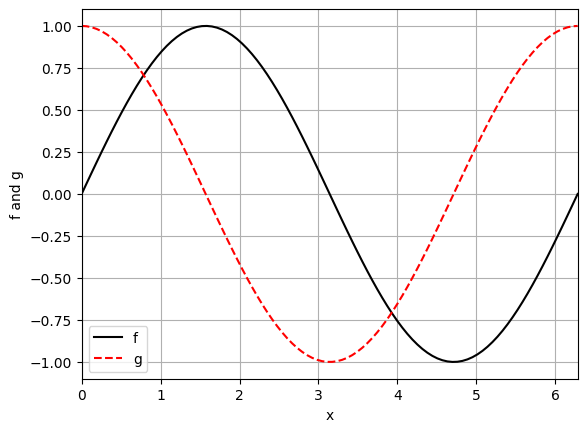

In [4]:
fig, ax = plt.subplots()
ax.plot(x, f, "k-", label="f")
ax.plot(x, g, "r--", label="g")
ax.set_xlabel("x")
ax.set_ylabel("f and g")
ax.set_xlim(left=0.0, right=2*np.pi)
ax.legend()
ax.grid()

Refer documentation for more details: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

## Subplots

This subsection will discuss about how to create subplots using matplotlib

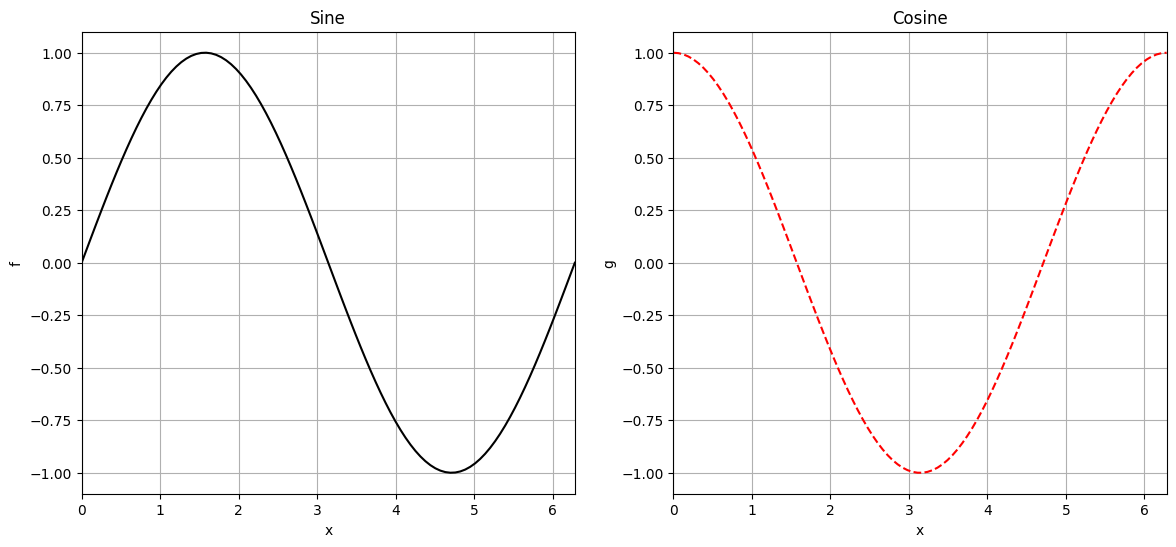

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))

ax[0].plot(x, f, "k-")
ax[0].set_xlabel("x")
ax[0].set_ylabel("f")
ax[0].set_title("Sine")
ax[0].set_xlim(left=0.0, right=2*np.pi)
ax[0].grid()

ax[1].plot(x, g, "r--")
ax[1].set_xlabel("x")
ax[1].set_ylabel("g")
ax[1].set_title("Cosine")
ax[1].set_xlim(left=0.0, right=2*np.pi)
ax[1].grid()

# ax.plot(x, f, "k-", label="f")
# ax.plot(x, g, "r--", label="g")
# ax.set_xlabel("x")
# ax.set_ylabel("f and g")
# ax.set_xlim(left=-np.pi, right=np.pi)
# ax.legend()
# ax.grid()

## Scatter plot

(0.0, 6.283185307179586)

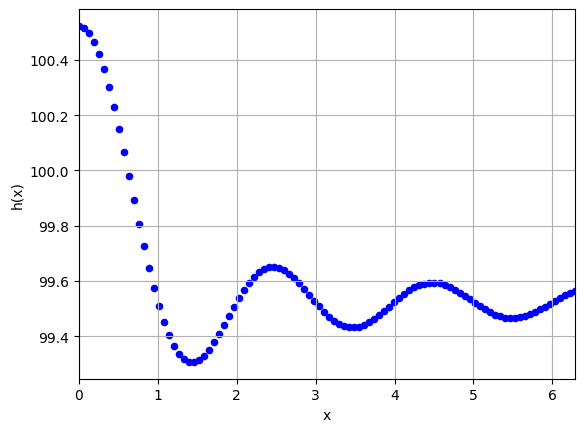

In [20]:
# Creating data
h = np.sinc(x) + norm.rvs(x.shape[0])

# Scatter plot
fig, ax = plt.subplots()
ax.scatter(x, h, marker="o", s=20, c="b")
ax.grid()
ax.set_xlabel("x")
ax.set_ylabel("h(x)")
ax.set_xlim(left=0.0, right=2*np.pi)


## Contour plot

In [22]:
import matplotlib.colors as colors

bean_function = lambda x: (1 - x[:,0])**2 + (1 - x[:,1])**2 + (2*x[:,1] - x[:,0]**2)**2 / 2

# Creating data
x = np.linspace(-2,2,num_points)
y = np.linspace(-1,3,num_points)

# Creating a mesh at which values will be evaluated and plotted
X, Y = np.meshgrid(x, y)

# Evaluating the function values at meshpoints
Z = bean_function(np.hstack((X.reshape(-1,1),Y.reshape(-1,1)))).reshape(num_points,num_points)

Below block of code

Text(0.5, 1.0, 'Bean Function')

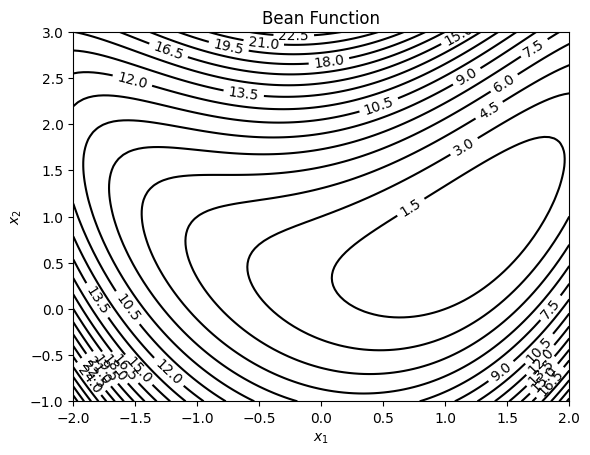

In [34]:
# Plotting the contours
fig, ax = plt.subplots()
cp = ax.contour(X, Y, Z, levels=20, colors="k")
ax.clabel(cp, cp.levels)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_title("Bean Function")

### Contour filled

Text(0.5, 1.0, 'Bean Function')

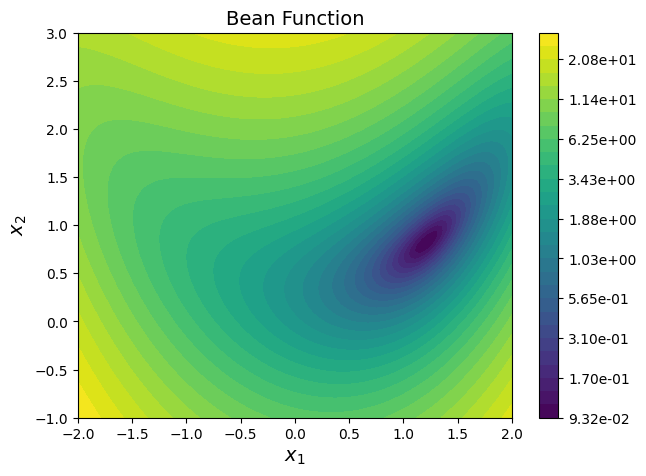

In [23]:
# Contour levels are evaluated in logscale since the difference
# between minimum and maximum value of function is large.
noOfLevels = 30
levels = np.logspace(np.log10(Z.min()), np.log10(Z.max()), noOfLevels, base = 10)

# Defining normalization which is used to normalize the function values
# before mapping with color. We need to use this since levels for contour
# is defined on log scale
norm = colors.LogNorm(vmin = Z.min(), vmax = Z.max())

# Plotting the contours
fig, ax = plt.subplots(figsize=(7,5))
CS = ax.contourf(X, Y, Z, levels=levels, norm=norm)
fig.colorbar(CS, format='%.2e', orientation='vertical')
ax.set_xlabel("$x_1$", fontsize=14)
ax.set_ylabel("$x_2$", fontsize=14)
ax.set_title("Bean Function", fontsize=14)